In [5]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,roc_auc_score



In [6]:
from pipeline import global_clustering_model,extract_cluster_features,combine_features,ClusterFeatures
from load import create_report_summary

# XG Boost



In [3]:


csv_dir = '../Datasets/Mouse B-ENaC Study/csv/'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]

for d,p in dataframes:
    name=p.split('_XV')[0]+'_XV'
    name=name.split('/')[-1]
    if 'wt' in p:
        control.append([d,name])
    else:
        beta.append([d,name])

In [4]:
control[0]

[      Specific Ventilation (mL/mL)    x (mm)    y (mm)   z (mm)
 0                         0.048627  0.195467  0.716711 -5.76218
 1                         0.094843  0.716711  0.716711 -5.76218
 2                         0.126857  1.237960  0.716711 -5.76218
 3                         0.328373 -1.368260  1.237960 -5.76218
 4                         0.261605 -0.847020  1.237960 -5.76218
 ...                            ...       ...       ...      ...
 4366                      0.725515  1.759200 -5.016970  8.83264
 4367                      0.419779  1.237960 -4.495730  8.83264
 4368                      0.192886  0.716711 -3.974480  8.83264
 4369                      0.124587  0.195467 -3.453240  8.83264
 4370                      0.224264  0.716711 -3.453240  8.83264
 
 [4371 rows x 4 columns],
 'MAL-006527_XV']

In [5]:
control_val=[control[0][0],control[1][0],control[2][0]]
g_model=global_clustering_model(control_val)

In [6]:
allDf=[]
for c in control:
    allDf.append([c[0],0])
for c in beta:
    allDf.append([c[0],1])

c=ClusterFeatures(allDf)
feat=c.extract()

feat

/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Label
0,-0.032553,0.029050,0.066374,0.021485,0.109898,0.022085,0.014012,0.052226,0.102296,0.085816,...,1.496810,1.496810,1.496810,1.119160,1.117405,1.203025,0.898510,0.861427,0.995530,0
1,-0.078470,-0.012801,0.040361,-0.023689,0.093361,0.007749,-0.045190,0.039273,0.085405,0.074302,...,1.250560,1.186645,1.294735,1.151810,1.108670,1.334470,1.151810,1.108670,1.334470,0
2,-0.160277,-0.029098,0.071498,0.053858,0.089879,0.008600,0.008600,0.008600,0.086331,0.049697,...,NaN,NaN,NaN,1.141770,1.111845,1.171260,1.119150,1.097375,1.168970,0
3,-0.226784,-0.004028,0.057665,0.014866,0.094927,-0.037643,-0.037643,-0.037643,0.110435,0.081406,...,0.876119,0.876119,0.876119,1.433490,1.325902,1.540185,0.832486,0.760683,1.330010,0
4,-0.229706,-0.026790,0.050300,-0.010475,0.104130,-0.053989,-0.064047,-0.046122,0.068958,0.030672,...,1.258060,1.107690,1.376507,1.133145,1.117198,1.149093,1.101250,1.045241,1.133145,0
5,-0.005997,0.013899,0.055920,0.015604,0.099543,0.044785,-0.000195,0.091388,0.066564,0.053201,...,1.007062,0.975298,1.030027,1.256070,1.115550,1.308770,1.034800,0.969781,1.150680,0
6,-0.155190,-0.012285,0.089448,0.066119,0.105037,NaN,NaN,NaN,NaN,NaN,...,1.119675,1.075767,1.163582,1.171730,1.139282,1.194643,0.990647,0.971917,1.122345,0
7,-0.141355,-0.020294,0.041103,-0.024257,0.111174,-0.065513,-0.145858,-0.023554,0.029275,-0.060763,...,1.015860,0.970818,1.154965,1.165000,1.155938,1.198997,0.973933,0.924045,1.074320,0
8,-0.084281,0.002099,0.086697,0.052745,0.114597,-0.000375,-0.009200,0.013131,0.110074,0.096453,...,1.263205,1.113802,1.449028,1.073620,1.073620,1.073620,0.957316,0.934615,0.998155,0
9,-0.098198,-0.006585,0.069716,-0.013151,0.099348,-0.036329,-0.068321,0.042024,0.107796,0.085453,...,1.309950,1.309950,1.309950,1.120670,1.100015,1.157030,1.100015,1.065835,1.138850,0


In [7]:
features = pd.DataFrame()


for c in control:
    
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:

    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature]) 
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)





/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [8]:
source = '../Datasets/Mouse B-ENaC Study/PDF_reports'

# Check if the folder exists
if not os.path.exists(source):
    print(f"The folder {source} does not exist.")
else:
    print(f"Folder {source} found.")


report_summary = create_report_summary(source)

report_features=[]

for _,row in features.iterrows():
    
    report_row = report_summary[report_summary['ScanName']==row['path']]
    report_row=report_row.drop(columns=['ScanName','DatePrepared','FileName'])
    report_features.append(report_row.values)
    
 


Folder ../Datasets/Mouse B-ENaC Study/PDF_reports found.


In [9]:
feat=features.drop(columns=['path'])
# features=combine_features(features,report_features,single=True)

In [10]:
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

features.fillna(0,inplace=True)


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features.values, labels, test_size=0.2, random_state=42)



In [11]:
labels=feat['Label']
feat=feat.drop(columns=['Label'])
feat=feat.apply(pd.to_numeric, errors='coerce')

feat.fillna(0,inplace=True)


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(feat.values, labels, test_size=0.2, random_state=42)



In [8]:

def XGBoost(X_tr, Y_tr, X_te, Y_te,quick=False):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
    }

    # Create the model
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        tree_method='hist',
        random_state=42
    )

    if quick:
            best_model = xgb_model
            best_model.fit(X_tr, Y_tr)

            xgb_pred = best_model.predict(X_te)


            ConfusionMatrixDisplay.from_estimator(estimator=best_model, X=X_te, y=Y_te)

            print("Classification Report: XGBoost",roc_auc_score(Y_te,xgb_pred))
            report = classification_report(Y_te, xgb_pred, digits=2)
            print(report)
            return best_model


    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='accuracy',  
        cv=10,  
        verbose=1,
        n_jobs=-1  
    )

  
    grid_search.fit(X_tr, Y_tr)

   
    best_model = grid_search.best_estimator_
    best_model.fit(X_tr, Y_tr)

    xgb_pred = best_model.predict(X_te)

    ConfusionMatrixDisplay.from_estimator(estimator=best_model, X=X_te, y=Y_te)

    print("Classification Report: XGBoost",roc_auc_score(Y_te,xgb_pred))
    report = classification_report(Y_te, xgb_pred, digits=2)
    print(report)
    return best_model
def RF(X_tr, Y_tr, X_te, Y_te):

    param_grid = {
        'n_estimators': [int(x) for x in np.linspace(start=10, stop=100, num=10)],  
        'max_depth': range(1, 20),  
        'criterion': ['gini', 'entropy'] 
    }


    optimal_params = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        cv=10, 
        scoring='accuracy',
        verbose=0,
        n_jobs=-1
    )


    optimal_params.fit(X_tr, Y_tr)
    print("Best parameters found: ", optimal_params.best_params_)


    criterion = optimal_params.best_params_['criterion']
    max_depth = optimal_params.best_params_['max_depth']
    n_estimators = optimal_params.best_params_['n_estimators']


    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        criterion=criterion,
        random_state=42
    )

    rf_model.fit(X_tr, Y_tr)


    rf_pred = rf_model.predict(X_te)


    ConfusionMatrixDisplay.from_estimator(estimator=rf_model, X=X_te, y=Y_te)

    print("Best Cross-Validation Score:",optimal_params.best_score_)
    print("Classification Report: Random Forest")
    print(classification_report(Y_te, rf_pred, digits=2),roc_auc_score(Y_te,rf_pred))
    return rf_model


In [13]:
features

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,path
0,0.074391,-0.009434,0.038368,0.015837,0.075134,0.107951,0.038701,0.142099,0.078896,0.054651,...,1.496810,1.496810,1.496810,1.119160,1.117405,1.203025,1.119160,1.117405,1.203025,0.0
1,-0.078470,-0.047142,0.021683,-0.043858,0.053776,0.007749,-0.045190,0.039273,0.085198,0.063406,...,1.250560,1.186645,1.294735,1.139340,1.096520,1.275765,1.151810,1.108670,1.334470,0.0
2,-0.160277,-0.074839,0.063364,0.052513,0.083908,0.008600,0.008600,0.008600,0.073317,0.046032,...,0.000000,0.000000,0.000000,1.119150,1.097375,1.168970,1.119150,1.097375,1.168970,0.0
3,-0.220874,-0.066582,0.032369,-0.002637,0.057665,-0.037643,-0.037643,-0.037643,0.034971,0.024414,...,0.000000,0.000000,0.000000,1.350160,1.313580,1.534160,1.340085,1.148640,1.529825,0.0
4,-0.227768,-0.067022,0.011097,-0.035352,0.045835,-0.053989,-0.064047,-0.046122,0.055334,0.015141,...,1.258060,1.107690,1.376507,1.133145,1.117198,1.149093,1.101250,1.045241,1.133145,0.0
5,-0.034160,-0.015323,0.038340,-0.012702,0.062798,0.021177,-0.024966,0.046709,0.066564,0.053201,...,1.007062,0.975298,1.030027,1.115550,1.070710,1.282420,0.982439,0.931959,1.103080,0.0
6,-0.189733,-0.060857,0.086293,0.045945,0.089448,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.966894,0.892572,1.075767,1.171730,1.139282,1.194643,0.971917,0.908173,1.016895,0.0
7,-0.141355,-0.049197,-0.007780,-0.065513,0.051133,-0.065513,-0.145858,-0.023554,0.024631,-0.065595,...,1.015860,0.970818,1.154965,1.163400,1.133550,1.166600,0.973933,0.924045,1.074320,0.0
8,-0.072721,-0.036935,0.054308,0.002279,0.076197,0.004933,-0.003823,0.051182,0.038298,0.016454,...,1.283820,1.162410,1.451580,1.073620,1.073620,1.073620,0.958089,0.956544,1.011510,0.0
9,-0.087319,-0.046438,0.045284,-0.037746,0.075904,-0.034981,-0.059720,0.044264,0.080574,0.038581,...,1.309950,1.309950,1.309950,1.100015,1.065835,1.138850,1.100015,1.065835,1.138850,0.0


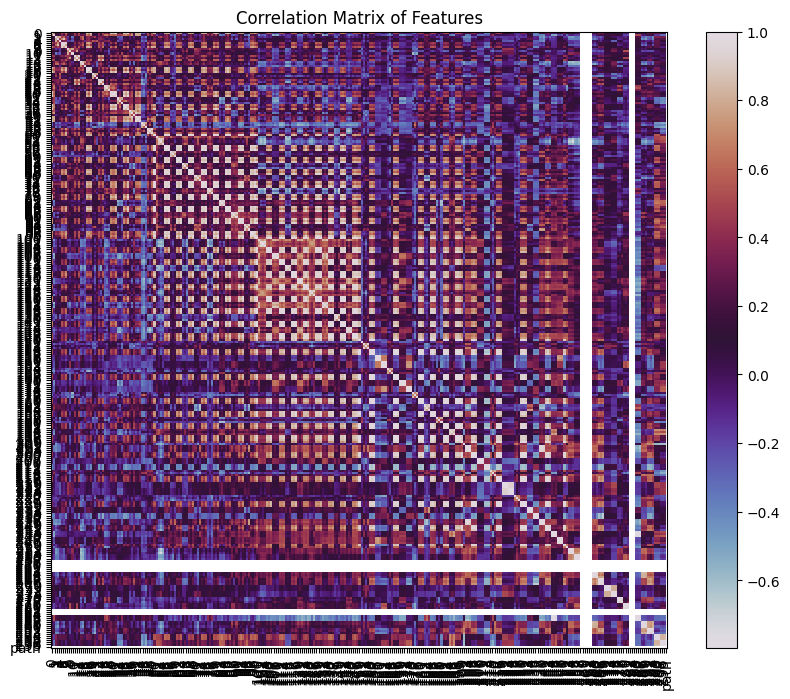

In [14]:


import matplotlib.pyplot as plt


corr_matrix = features.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='twilight', interpolation='none')
plt.colorbar()  # Add a color bar to indicate the correlation scale

# Set the axis labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title('Correlation Matrix of Features')
plt.show()

In [15]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt

# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features.fillna(0))  

# print(scaled_features.shape)

# # Step 2: Apply PCA
# pca = PCA(n_components=6)  # Keep enough components to explain 95% of the variance
# reduced_features = pca.fit_transform(scaled_features)




# pca_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(pca.n_components_)])


# # print(pca_df)

# X_train, X_test, y_train, y_test = train_test_split(pca_df.values, labels, test_size=0.2, random_state=42)





Classification Report: XGBoost 0.625
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



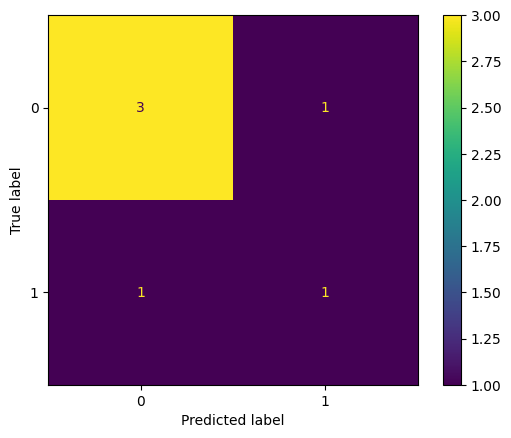

In [16]:
model=XGBoost(X_train, y_train,X_test, y_test,True)

In [17]:

csv_dir = '../Datasets/Mouse B-ENaC Study/Additional Data updated 20240807/Specific Ventilation - Study 2'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [18]:

features=features.drop(columns=['path'])
# features=combine_features(features,report_features,single=True)
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

features.fillna(0,inplace=True)

In [19]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt

# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features.fillna(0))  


# pca = PCA(n_components=0.95) 
# reduced_features = pca.fit_transform(scaled_features)




# pca_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(5)])






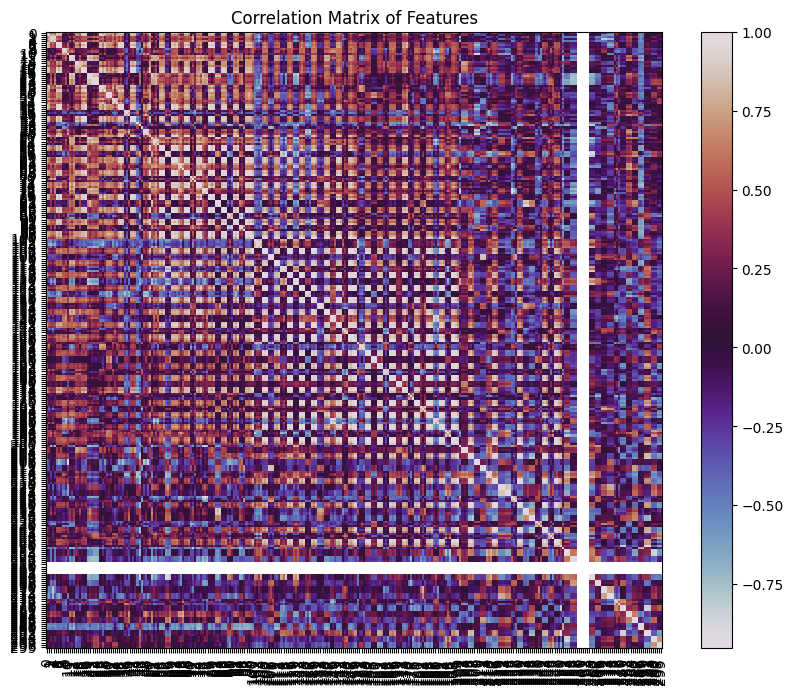

In [20]:

import matplotlib.pyplot as plt


corr_matrix = features.fillna(0).corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='twilight', interpolation='none')
plt.colorbar()  # Add a color bar to indicate the correlation scale

# Set the axis labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title('Correlation Matrix of Features')
plt.show()

Classification Report: XGBoost 0.75
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.50      0.67         6

    accuracy                           0.73        11
   macro avg       0.81      0.75      0.72        11
weighted avg       0.83      0.73      0.71        11



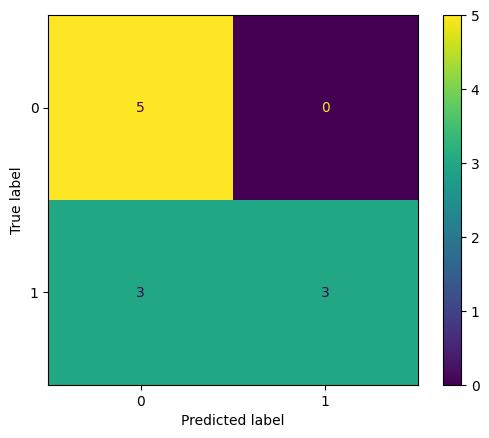

In [21]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost",roc_auc_score(labels,xgb_pred))
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [22]:

csv_dir = '../Datasets/Mouse B-ENaC Study/Additional Data updated 20240807/Specific Ventilation - Study 3'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [23]:

features=features.drop(columns=['path'])
# features=combine_features(features,report_features,single=True)
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
features.fillna(0,inplace=True)

Classification Report: XGBoost 0.75
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.62      1.00      0.77         5

    accuracy                           0.73        11
   macro avg       0.81      0.75      0.72        11
weighted avg       0.83      0.73      0.71        11



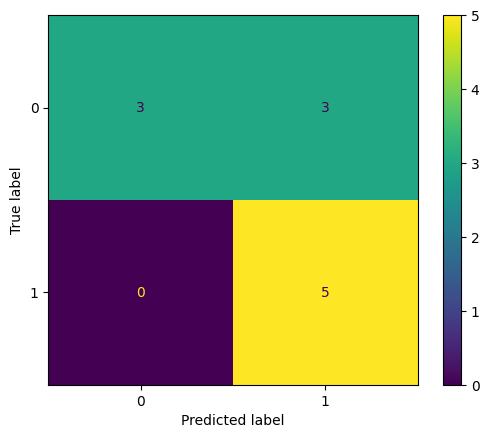

In [24]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost",roc_auc_score(labels,xgb_pred))
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [25]:

csv_dir = '../Datasets/ETI Study/CSV/Control'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()
for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

# source = '../Datasets/Mouse B-ENaC Study/PDF_reports'

# # Check if the folder exists
# if not os.path.exists(source):
#     print(f"The folder {source} does not exist.")
# else:
#     print(f"Folder {source} found.")


# report_summary = create_report_summary(source)

# report_features=[]

# for _,row in features.iterrows():
    
#     report_row = report_summary[report_summary['ScanName']==row['path']]
#     report_row=report_row.drop(columns=['ScanName','DatePrepared','FileName'])
#     report_features.append(report_row.values[0])
    

/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [26]:

features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
features.fillna(0,inplace=True)

Classification Report: XGBoost 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.38      1.00      0.56         5

    accuracy                           0.38        13
   macro avg       0.19      0.50      0.28        13
weighted avg       0.15      0.38      0.21        13



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

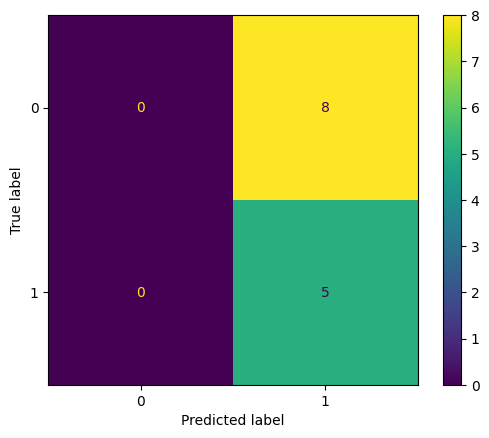

In [27]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost",roc_auc_score(labels,xgb_pred))
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [28]:

csv_dir = '../Datasets/ETI Study/CSV/Trikafta'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    c[0].columns=['Specific Ventilation (mL/mL)','x (mm)','y (mm)','z (mm)']
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [29]:
features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
features.fillna(0,inplace=True)

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       9.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

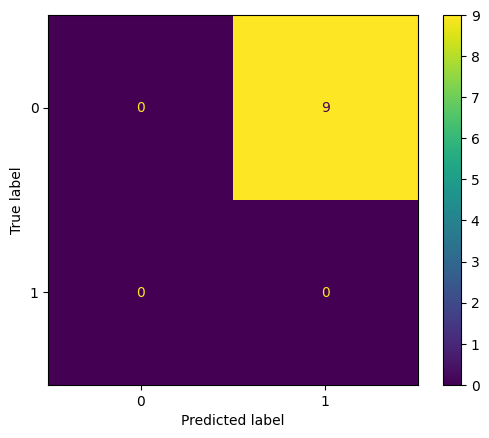

In [30]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost")
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [31]:

csv_dir = '../Datasets/ETI Study/CSV/Control'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

control_val=[control[0][0],control[1][0]]
g_model_ETI=global_clustering_model(control_val)
features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [32]:
features=features.drop(columns=['path'])
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
features.fillna(0,inplace=True)
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features.values, labels, test_size=0.08, stratify=labels,random_state=42)



Classification Report: XGBoost 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

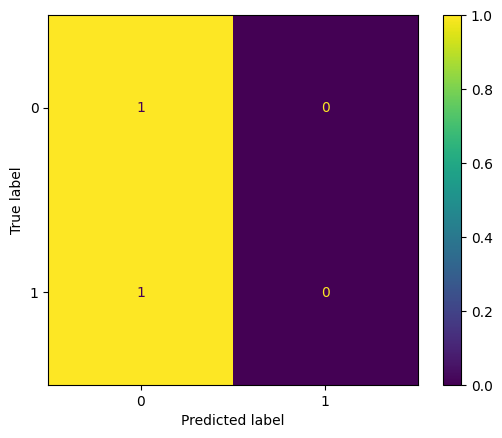

In [33]:

ETImodel=XGBoost(X_train, y_train,X_test, y_test,quick=True)

In [34]:

csv_dir = '../Datasets/ETI Study/CSV/Trikafta'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    c[0].columns=['Specific Ventilation (mL/mL)','x (mm)','y (mm)','z (mm)']
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [35]:

features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
features.fillna(0,inplace=True)

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.00      0.00      0.00         0

    accuracy                           0.56         9
   macro avg       0.50      0.28      0.36         9
weighted avg       1.00      0.56      0.71         9



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


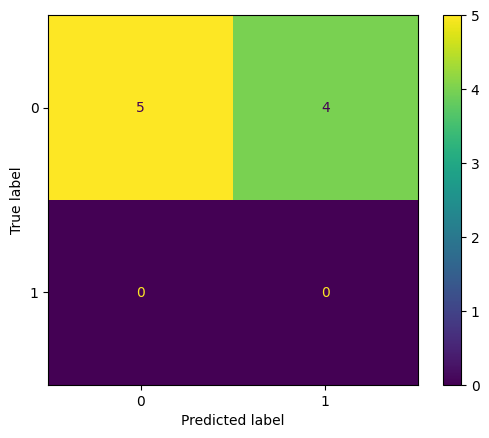

In [36]:

xgb_pred = ETImodel.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=ETImodel, X=features, y=labels)

print("Classification Report: XGBoost")
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [37]:

csv_dir = '../Datasets/ETI Study/CSV/Control'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [38]:

features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
features.fillna(0,inplace=True)

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.38      1.00      0.56         5

    accuracy                           0.38        13
   macro avg       0.19      0.50      0.28        13
weighted avg       0.15      0.38      0.21        13



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

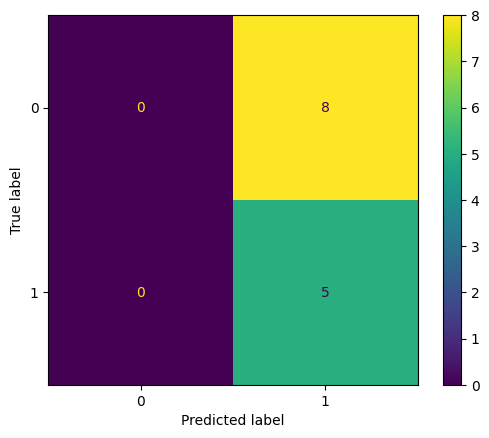

In [39]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost")
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [40]:

csv_dir = '../Datasets/ETI Study/CSV/Trikafta'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


KeyError: 'x (mm)'

In [ ]:

features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.00      0.00      0.00         0

    accuracy                           0.33         9
   macro avg       0.50      0.17      0.25         9
weighted avg       1.00      0.33      0.50         9



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


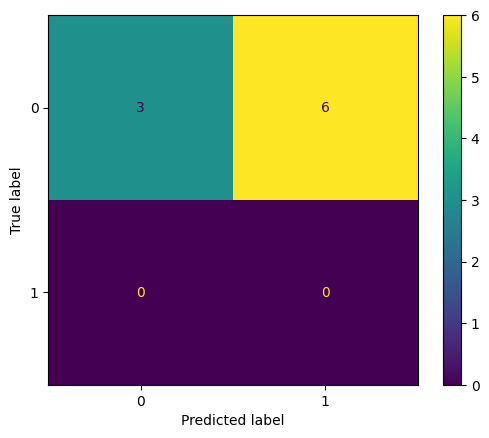

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost")
report = classification_report(labels, xgb_pred, digits=2)
print(report)

# RF




In [ ]:


csv_dir = '../Datasets/Mouse B-ENaC Study/csv/'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]

for d,p in dataframes:
    name=p.split('_XV')[0]+'_XV'
    name=name.split('/')[-1]
    if 'wt' in p:
        control.append([d,name])
    else:
        beta.append([d,name])

In [ ]:
control_val=[c[0] for c in control]
g_model=global_clustering_model(control_val)

In [ ]:
features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)





/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:
source = '../Datasets/Mouse B-ENaC Study/PDF_reports'

# Check if the folder exists
if not os.path.exists(source):
    print(f"The folder {source} does not exist.")
else:
    print(f"Folder {source} found.")


report_summary = create_report_summary(source)

report_features=[]

for _,row in features.iterrows():
    
    report_row = report_summary[report_summary['ScanName']==row['path']]
    report_row=report_row.drop(columns=['ScanName','DatePrepared','FileName'])
    report_features.append(report_row.values[0])
    
 


Folder ../Datasets/Mouse B-ENaC Study/PDF_reports found.


In [ ]:
features=features.drop(columns=['path'])
features=combine_features(features,report_features,single=True)

In [ ]:
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features.values, labels, test_size=0.2, random_state=42)



In [ ]:


def XGBoost(X_tr, Y_tr, X_te, Y_te,quick=False):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
    }

    # Create the model
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        tree_method='hist',
        random_state=42
    )

    if quick:
            best_model = xgb_model
            best_model.fit(X_tr, Y_tr)

            xgb_pred = best_model.predict(X_te)

            ConfusionMatrixDisplay.from_estimator(estimator=best_model, X=X_te, y=Y_te)

            print("Classification Report: XGBoost",roc_auc_score(Y_te,xgb_pred))
            report = classification_report(Y_te, xgb_pred, digits=2)
            print(report)
            return best_model


    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='accuracy',  
        cv=10,  
        verbose=1,
        n_jobs=-1  
    )

  
    grid_search.fit(X_tr, Y_tr)

   
    best_model = grid_search.best_estimator_
    best_model.fit(X_tr, Y_tr)

    xgb_pred = best_model.predict(X_te)

    ConfusionMatrixDisplay.from_estimator(estimator=best_model, X=X_te, y=Y_te)

    print("Classification Report: XGBoost",roc_auc_score(Y_te,xgb_pred))
    report = classification_report(Y_te, xgb_pred, digits=2)
    print(report)
    return best_model

def RF(X_tr, Y_tr, X_te, Y_te):

    param_grid = {
        'n_estimators': [int(x) for x in np.linspace(start=10, stop=100, num=10)],  
        'max_depth': range(1, 20),  
        'criterion': ['gini', 'entropy'] 
    }


    optimal_params = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        cv=10, 
        scoring='accuracy',
        verbose=0,
        n_jobs=-1
    )

    
    optimal_params.fit(X_tr, Y_tr)
    print("Best parameters found: ", optimal_params.best_params_)


    criterion = optimal_params.best_params_['criterion']
    max_depth = optimal_params.best_params_['max_depth']
    n_estimators = optimal_params.best_params_['n_estimators']


    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        criterion=criterion,
        random_state=42
    )

    rf_model.fit(X_tr, Y_tr)


    rf_pred = rf_model.predict(X_te)


    ConfusionMatrixDisplay.from_estimator(estimator=rf_model, X=X_te, y=Y_te)

    print("Best Cross-Validation Score:",optimal_params.best_score_)
    print("Classification Report: Random Forest")
    print(classification_report(Y_te, rf_pred, digits=2),roc_auc_score(Y_te,rf_pred))
    return rf_model


In [ ]:
features

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,0.0,-1.275796,2.062518,1.550249,1.458079,1.935268,2.067655,2.178776,2.300316,0.0,...,2.043141,0.0,-0.980284,0.432730,0.350130,-0.676459,-0.480934,-0.278341,1.153273,-0.567455
1,0.0,0.688999,0.142080,-0.684934,0.294558,0.212770,0.148662,0.072571,-0.014084,0.0,...,-1.352326,0.0,0.222712,0.691579,0.756327,0.008044,0.321517,0.754990,0.510363,0.736046
2,0.0,-0.471919,0.685169,-0.439904,0.745287,0.742929,0.671754,0.601994,0.613451,0.0,...,-1.412803,0.0,-1.152141,0.910088,0.791531,1.678885,-0.691055,1.119847,0.137567,0.132021
3,0.0,0.281716,-0.129097,-1.011569,0.147061,-0.025469,-0.121663,-0.226543,-0.352555,0.0,...,0.034258,0.0,-1.667710,0.477848,0.606444,0.812119,-2.394800,-1.377828,1.867206,-0.874308
4,0.0,-0.174741,0.676897,-0.306068,0.724462,0.726905,0.648926,0.611361,0.623903,0.0,...,0.413855,0.0,0.713731,0.433794,-0.739283,-0.439075,2.209696,1.848274,0.636278,-0.596134
5,0.0,0.987246,0.032950,-0.927652,0.274229,0.129656,0.027594,-0.057661,-0.160569,0.0,...,2.132868,0.0,-0.292858,-0.057049,-0.476193,0.108950,1.047808,0.076390,-0.339595,-0.460019
6,0.0,-0.730613,-0.762488,-0.051215,-0.722075,-0.764379,-0.753990,-0.751444,-0.769326,0.0,...,-0.359604,0.0,-1.004835,0.051750,0.175669,-0.321616,0.593401,0.053245,0.037395,-0.125021
7,0.0,0.474133,-0.017150,-0.713225,0.133959,0.072788,0.014374,-0.080604,-0.220398,0.0,...,0.231933,0.0,0.026305,-0.104304,-0.724135,0.681804,1.353959,0.516467,0.215726,-0.655966
8,0.0,-0.328675,-0.736656,-0.365868,-0.536856,-0.705375,-0.738378,-0.757299,-0.789464,0.0,...,0.347066,0.0,-0.562918,-0.092791,0.447507,-0.430094,-0.627348,-0.673575,-0.437365,0.460080
9,0.0,-0.510402,0.661514,-0.263636,0.708713,0.706474,0.645397,0.594208,0.664952,0.0,...,-1.374038,0.0,-0.170103,0.986059,1.074988,-0.296434,-0.257959,1.501740,0.837196,0.876043


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/numpy/ma/core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 30}
Best Cross-Validation Score: 0.9
Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6
 0.625


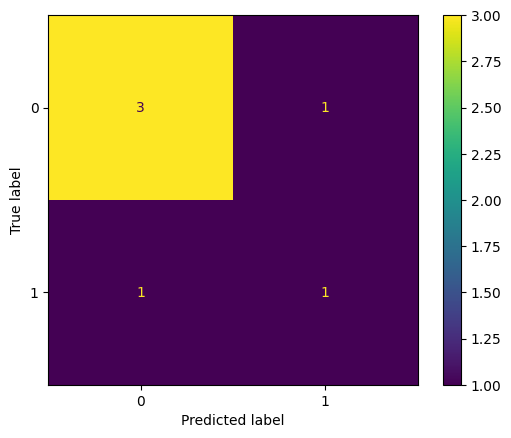

In [ ]:
model=RF(X_train, y_train,X_test, y_test)

In [ ]:

csv_dir = '../Datasets/Mouse B-ENaC Study/Additional Data updated 20240807/Specific Ventilation - Study 2'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:

features=features.drop(columns=['path'])
# features=combine_features(features,report_features,single=True)
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

Classification Report: XGBoost 0.5
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.00      0.00      0.00         6

    accuracy                           0.45        11
   macro avg       0.23      0.50      0.31        11
weighted avg       0.21      0.45      0.28        11



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

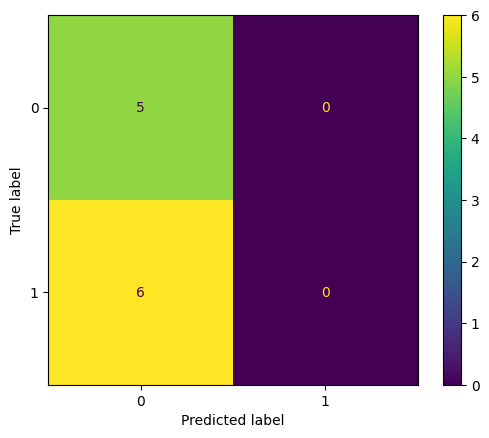

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost",roc_auc_score(labels,xgb_pred))
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [ ]:

csv_dir = '../Datasets/Mouse B-ENaC Study/Additional Data updated 20240807/Specific Ventilation - Study 3'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:

features=features.drop(columns=['path'])
# features=combine_features(features,report_features,single=True)
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

Classification Report: XGBoost 0.5
              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       0.00      0.00      0.00         5

    accuracy                           0.55        11
   macro avg       0.27      0.50      0.35        11
weighted avg       0.30      0.55      0.39        11



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

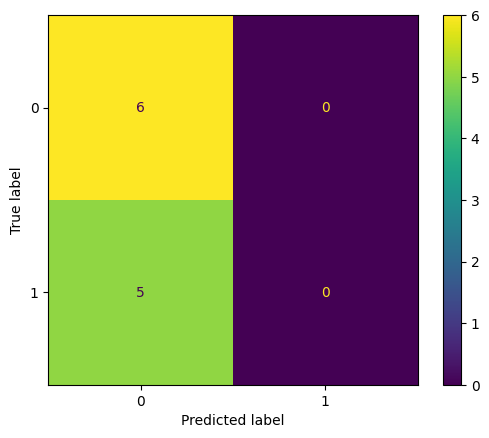

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost",roc_auc_score(labels,xgb_pred))
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [ ]:

csv_dir = '../Datasets/ETI Study/CSV/Control'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:

features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

Classification Report: XGBoost 0.6875
              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.50      1.00      0.67         5

    accuracy                           0.62        13
   macro avg       0.75      0.69      0.61        13
weighted avg       0.81      0.62      0.59        13



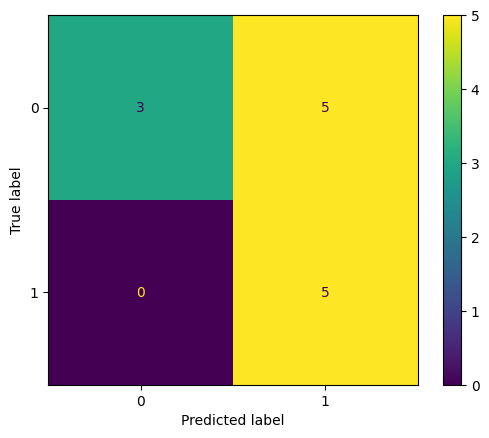

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost",roc_auc_score(labels,xgb_pred))
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [ ]:

csv_dir = '../Datasets/ETI Study/CSV/Trikafta'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:
features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.00      0.00      0.00         0

    accuracy                           0.11         9
   macro avg       0.50      0.06      0.10         9
weighted avg       1.00      0.11      0.20         9



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


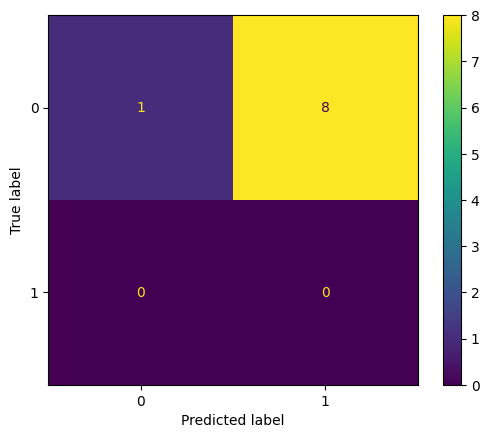

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost")
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [ ]:

csv_dir = '../Datasets/ETI Study/CSV/Control'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

control_val=[c[0] for c in control]
g_model_ETI=global_clustering_model(control_val)
features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:
features=features.drop(columns=['path'])
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features.values, labels, test_size=0.08, stratify=labels,random_state=42)



Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

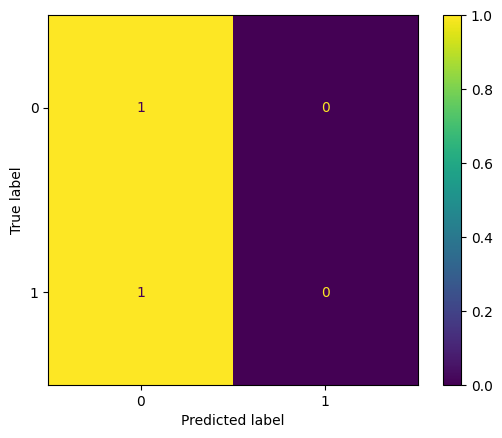

In [ ]:

ETImodel=RandomForestClassifier(n_estimators=42)
ETImodel.fit(X_train,y_train)


xgb_pred = ETImodel.predict(X_test)

ConfusionMatrixDisplay.from_estimator(estimator=ETImodel, X=X_test, y=y_test)

print("Classification Report: XGBoost")
report = classification_report(y_test, xgb_pred, digits=2)
print(report)


In [ ]:

csv_dir = '../Datasets/ETI Study/CSV/Trikafta'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:

features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.00      0.00      0.00         0

    accuracy                           0.67         9
   macro avg       0.50      0.33      0.40         9
weighted avg       1.00      0.67      0.80         9



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


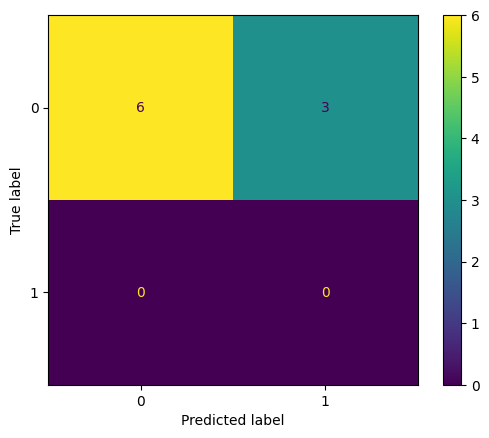

In [ ]:

xgb_pred = ETImodel.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=ETImodel, X=features, y=labels)

print("Classification Report: XGBoost")
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [ ]:

csv_dir = '../Datasets/ETI Study/CSV/Control'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:

features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.38      1.00      0.56         5

    accuracy                           0.38        13
   macro avg       0.19      0.50      0.28        13
weighted avg       0.15      0.38      0.21        13



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

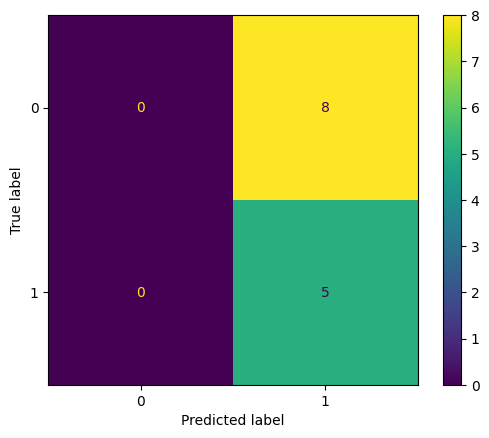

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost")
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [ ]:

csv_dir = '../Datasets/ETI Study/CSV/Trikafta'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:

features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       9.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

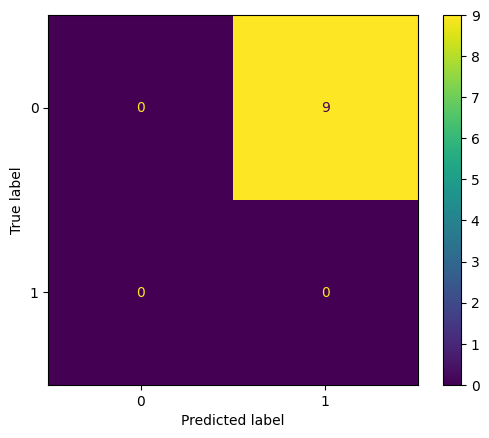

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost")
report = classification_report(labels, xgb_pred, digits=2)
print(report)

# XG Boost Spatial



In [ ]:


csv_dir = '../Datasets/Mouse B-ENaC Study/csv/'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]

for d,p in dataframes:
    name=p.split('_XV')[0]+'_XV'
    name=name.split('/')[-1]
    if 'wt' in p:
        control.append([d,name])
    else:
        beta.append([d,name])

In [ ]:
control_val=[control[0][0],control[1][0],control[2][0]]
g_model=global_clustering_model(control_val)

In [ ]:
features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)





/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:
source = '../Datasets/Mouse B-ENaC Study/PDF_reports'

# Check if the folder exists
if not os.path.exists(source):
    print(f"The folder {source} does not exist.")
else:
    print(f"Folder {source} found.")


report_summary = create_report_summary(source)

report_features=[]

for _,row in features.iterrows():
    
    report_row = report_summary[report_summary['ScanName']==row['path']]
    report_row=report_row.drop(columns=['ScanName','DatePrepared','FileName'])
    report_features.append(report_row.values)
    
 


Folder ../Datasets/Mouse B-ENaC Study/PDF_reports found.


In [ ]:
features=features.drop(columns=['path'])
# features=combine_features(features,report_features,single=True)

In [ ]:
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
features.fillna(0,inplace=True)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features.values, labels, test_size=0.2, random_state=42)



In [5]:


def XGBoost(X_tr, Y_tr, X_te, Y_te,quick=False):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
    }

    # Create the model
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        tree_method='hist',
        random_state=42
    )

    if quick:
            best_model = xgb_model
            best_model.fit(X_tr, Y_tr)

            xgb_pred = best_model.predict(X_te)

            ConfusionMatrixDisplay.from_estimator(estimator=best_model, X=X_te, y=Y_te)

            print("Classification Report: XGBoost",roc_auc_score(Y_te,xgb_pred))
            report = classification_report(Y_te, xgb_pred, digits=2)
            print(report)
            return best_model


    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='accuracy',  
        cv=10,  
        verbose=1,
        n_jobs=-1  
    )

  
    grid_search.fit(X_tr, Y_tr)

   
    best_model = grid_search.best_estimator_
    best_model.fit(X_tr, Y_tr)

    xgb_pred = best_model.predict(X_te)

    ConfusionMatrixDisplay.from_estimator(estimator=best_model, X=X_te, y=Y_te)

    print("Classification Report: XGBoost",roc_auc_score(Y_te,xgb_pred))
    report = classification_report(Y_te, xgb_pred, digits=2)
    print(report)
    return best_model
def RF(X_tr, Y_tr, X_te, Y_te):

    param_grid = {
        'n_estimators': [int(x) for x in np.linspace(start=10, stop=100, num=10)],  
        'max_depth': range(1, 20),  
        'criterion': ['gini', 'entropy'] 
    }


    optimal_params = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        cv=10, 
        scoring='accuracy',
        verbose=0,
        n_jobs=-1
    )


    optimal_params.fit(X_tr, Y_tr)
    print("Best parameters found: ", optimal_params.best_params_)


    criterion = optimal_params.best_params_['criterion']
    max_depth = optimal_params.best_params_['max_depth']
    n_estimators = optimal_params.best_params_['n_estimators']


    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        criterion=criterion,
        random_state=42
    )

    rf_model.fit(X_tr, Y_tr)


    rf_pred = rf_model.predict(X_te)


    ConfusionMatrixDisplay.from_estimator(estimator=rf_model, X=X_te, y=Y_te)

    print("Best Cross-Validation Score:",optimal_params.best_score_)
    print("Classification Report: Random Forest")
    print(classification_report(Y_te, rf_pred, digits=2),roc_auc_score(Y_te,rf_pred))
    return rf_model


In [ ]:
features

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,0.0,0.429177,0.0,0.365245,0.359195,0.330631,0.382384,0.362422,0.337183,0.392434,...,0.275987,0.250034,0.208432,0.280060,0.247393,0.186220,0.276974,0.234422,0.198964,0.267488
1,0.0,0.556027,0.0,0.367953,0.373778,0.349780,0.401444,0.360769,0.337289,0.386645,...,0.258931,0.241376,0.197762,0.270226,0.251445,0.218029,0.280205,0.258091,0.234760,0.281459
2,0.0,0.680204,0.0,0.366602,0.366009,0.342467,0.392879,0.364954,0.338437,0.396284,...,0.277143,0.251394,0.206600,0.276154,0.235700,0.214052,0.268072,0.243723,0.207289,0.275140
3,0.0,0.349547,0.0,0.359754,0.365913,0.344633,0.390103,0.352532,0.324683,0.377792,...,0.265000,0.252050,0.212155,0.282162,0.220212,0.185470,0.263683,0.268711,0.246105,0.286406
4,0.0,0.439237,0.0,0.369190,0.363490,0.337275,0.390336,0.373903,0.340126,0.398240,...,0.274404,0.241231,0.194159,0.276410,0.239252,0.194111,0.271602,0.235961,0.178069,0.275023
5,0.0,0.435405,0.0,0.360918,0.346189,0.323194,0.372571,0.353166,0.335301,0.379101,...,0.270351,0.251191,0.197720,0.284044,0.242908,0.207930,0.270852,0.246270,0.193337,0.278946
6,0.0,0.198020,0.0,0.364828,0.350259,0.323333,0.384145,0.378697,0.350077,0.404088,...,0.253272,0.254824,0.199095,0.285332,0.255934,0.235433,0.283495,0.241824,0.202785,0.275512
7,0.0,0.350895,0.0,0.369115,0.367590,0.342566,0.392822,0.366935,0.341638,0.392776,...,0.262486,0.252542,0.209241,0.278533,0.221836,0.182754,0.261328,0.230776,0.171225,0.270366
8,0.0,0.418870,0.0,0.350891,0.335653,0.320109,0.366297,0.331191,0.316986,0.356605,...,0.279457,0.260532,0.208016,0.282841,0.248258,0.206054,0.272775,0.263671,0.202142,0.284371
9,0.0,0.357677,0.0,0.360796,0.366368,0.345535,0.388698,0.365513,0.334460,0.390673,...,0.261029,0.238232,0.182831,0.273566,0.257619,0.222272,0.282413,0.257074,0.221098,0.280546


Classification Report: XGBoost 0.625
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



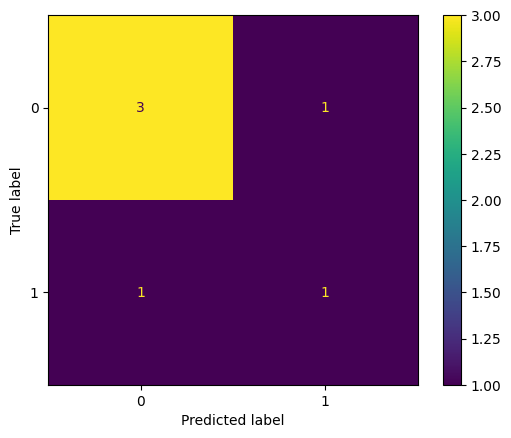

In [ ]:
model=XGBoost(X_train, y_train,X_test, y_test,True)

In [ ]:

csv_dir = '../Datasets/Mouse B-ENaC Study/Additional Data updated 20240807/Specific Ventilation - Study 2'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:

features=features.drop(columns=['path'])
# features=combine_features(features,report_features,single=True)
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
features.fillna(0,inplace=True)

Classification Report: XGBoost 0.75
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.50      0.67         6

    accuracy                           0.73        11
   macro avg       0.81      0.75      0.72        11
weighted avg       0.83      0.73      0.71        11



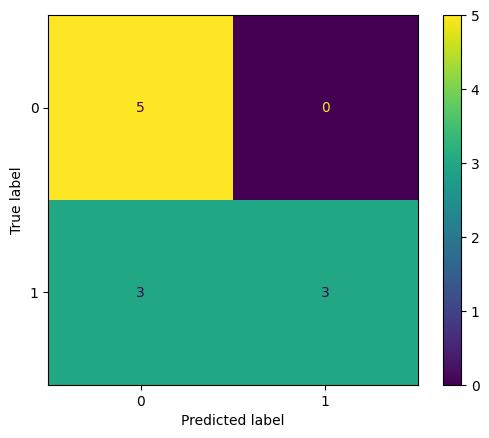

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost",roc_auc_score(labels,xgb_pred))
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [ ]:

csv_dir = '../Datasets/Mouse B-ENaC Study/Additional Data updated 20240807/Specific Ventilation - Study 3'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:

features=features.drop(columns=['path'])
# features=combine_features(features,report_features,single=True)
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
features.fillna(0,inplace=True)

Classification Report: XGBoost 0.7166666666666668
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.75      0.60      0.67         5

    accuracy                           0.73        11
   macro avg       0.73      0.72      0.72        11
weighted avg       0.73      0.73      0.72        11



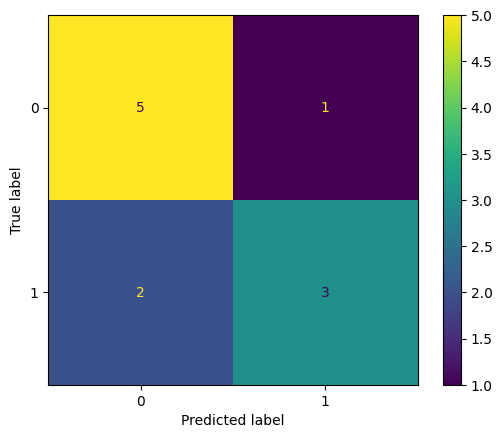

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost",roc_auc_score(labels,xgb_pred))
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [ ]:

csv_dir = '../Datasets/ETI Study/CSV/Control'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()
for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

# source = '../Datasets/Mouse B-ENaC Study/PDF_reports'

# # Check if the folder exists
# if not os.path.exists(source):
#     print(f"The folder {source} does not exist.")
# else:
#     print(f"Folder {source} found.")


# report_summary = create_report_summary(source)

# report_features=[]

# for _,row in features.iterrows():
    
#     report_row = report_summary[report_summary['ScanName']==row['path']]
#     report_row=report_row.drop(columns=['ScanName','DatePrepared','FileName'])
#     report_features.append(report_row.values[0])
    

/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:

features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
features.fillna(0,inplace=True)

Classification Report: XGBoost 0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.33      0.80      0.47         5

    accuracy                           0.31        13
   macro avg       0.17      0.40      0.24        13
weighted avg       0.13      0.31      0.18        13



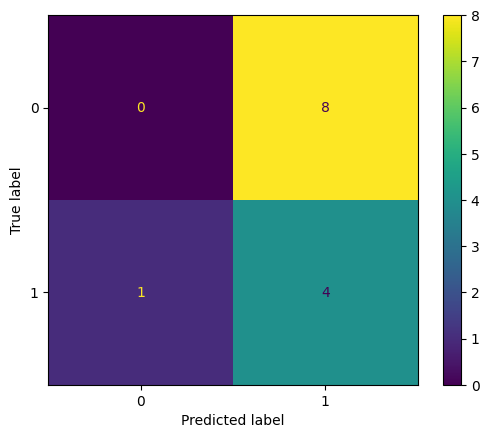

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost",roc_auc_score(labels,xgb_pred))
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [ ]:

csv_dir = '../Datasets/ETI Study/CSV/Trikafta'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:
features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       9.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

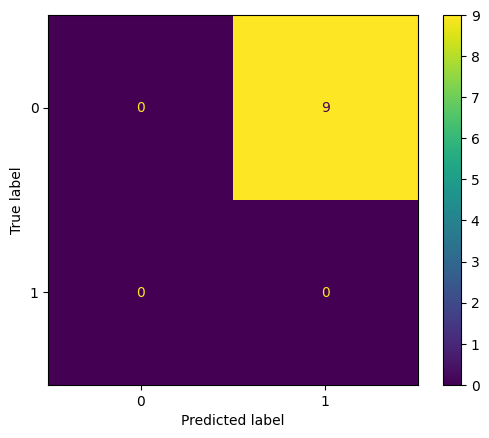

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost")
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [ ]:

csv_dir = '../Datasets/ETI Study/CSV/Control'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

control_val=[control[0][0],control[1][0]]
g_model_ETI=global_clustering_model(control_val)
features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:
features=features.drop(columns=['path'])
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features.values, labels, test_size=0.08, stratify=labels,random_state=42)



Classification Report: XGBoost 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

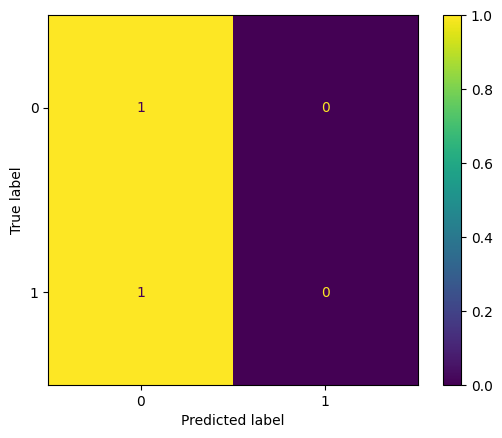

In [ ]:

ETImodel=XGBoost(X_train, y_train,X_test, y_test,quick=True)

In [ ]:

csv_dir = '../Datasets/ETI Study/CSV/Trikafta'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:

features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.00      0.00      0.00         0

    accuracy                           0.78         9
   macro avg       0.50      0.39      0.44         9
weighted avg       1.00      0.78      0.88         9



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


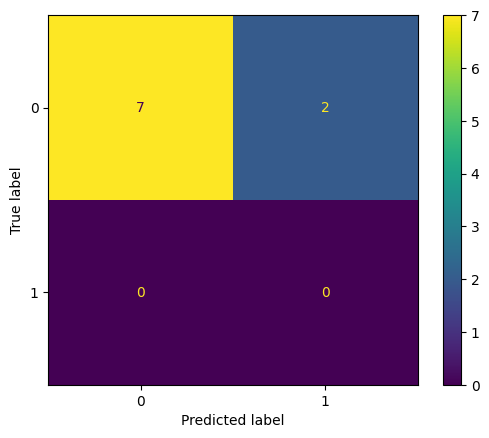

In [ ]:

xgb_pred = ETImodel.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=ETImodel, X=features, y=labels)

print("Classification Report: XGBoost")
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [ ]:

csv_dir = '../Datasets/ETI Study/CSV/Control'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 1
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:

features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.29      0.40      0.33         5

    accuracy                           0.38        13
   macro avg       0.39      0.39      0.38        13
weighted avg       0.42      0.38      0.39        13



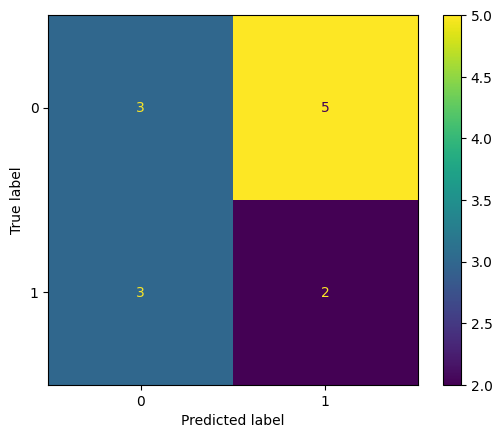

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost")
report = classification_report(labels, xgb_pred, digits=2)
print(report)

In [ ]:

csv_dir = '../Datasets/ETI Study/CSV/Trikafta'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]
labels=[]

for d,p in dataframes:
    name=p.split('/')[-1]
    name=name.split('.')[0]+'_XV'
    if 'WT' in p:
        control.append([d,name])
        labels.append(0)
    else:
        beta.append([d,name])
        labels.append(1)

features = pd.DataFrame()

for c in control:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)

for c in beta:
    _, feature = extract_cluster_features(c[0], g_model_ETI)
    feature_df = pd.DataFrame([feature])
    feature_df['Label'] = 0
    feature_df['path']=c[1]
    features = pd.concat([features, feature_df], ignore_index=True)


/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but K

In [ ]:

features=features.drop(columns=['path'])
features=features.apply(pd.to_numeric, errors='coerce')
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.00      0.00      0.00         0

    accuracy                           0.33         9
   macro avg       0.50      0.17      0.25         9
weighted avg       1.00      0.33      0.50         9



/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


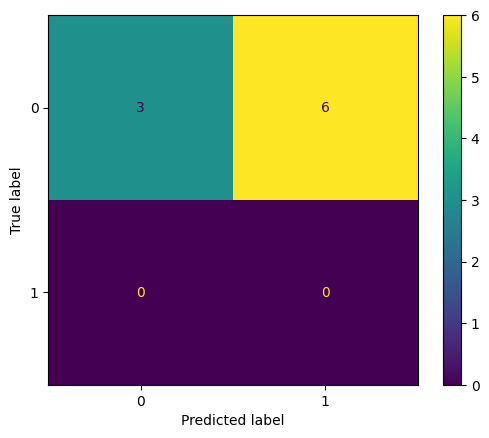

In [ ]:

xgb_pred = model.predict(features)

ConfusionMatrixDisplay.from_estimator(estimator=model, X=features, y=labels)

print("Classification Report: XGBoost")
report = classification_report(labels, xgb_pred, digits=2)
print(report)

# LBP

In [1]:
from pipeline import LBP_3D
import os
import pandas as pd


csv_dir = '../Datasets/Mouse B-ENaC Study/csv/'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

data=[]
for d,p in dataframes:
    name=p.split('_XV')[0]+'_XV'
    name=name.split('/')[-1]
    d.columns=['SV','X','Y','Z']
    if 'wt' in p:
        
        data.append([d,0])
    else:
        data.append([d,1])


lbp=LBP_3D(data)
features=lbp.extract()

In [2]:
features

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Label
0,0.007576,0.006874,0.005261,0.000561,0.007365,0.014029,0.004419,0.001333,0.004630,0.005962,...,0.001263,0.001192,0.002034,0.004419,0.001403,0.000351,0.001192,0.001613,0.703984,0
1,0.007856,0.007316,0.004018,0.000480,0.006657,0.015052,0.004798,0.001739,0.004198,0.005097,...,0.001019,0.000780,0.002579,0.002999,0.001079,0.000300,0.000720,0.001199,0.705547,1
2,0.008710,0.007246,0.004538,0.000366,0.006661,0.015737,0.005343,0.001537,0.003221,0.003733,...,0.000878,0.001318,0.001903,0.004611,0.000952,0.000366,0.000512,0.001757,0.727126,0
3,0.009424,0.007496,0.005283,0.000785,0.005069,0.015706,0.005783,0.001214,0.004641,0.004569,...,0.000928,0.001499,0.001928,0.005283,0.001142,0.000428,0.000785,0.001499,0.696652,0
4,0.007889,0.007389,0.005333,0.000944,0.005556,0.016611,0.005333,0.001389,0.005000,0.004611,...,0.001333,0.001722,0.003056,0.004500,0.001500,0.000222,0.001778,0.001611,0.645389,1
5,0.011223,0.008097,0.006013,0.001283,0.005932,0.010502,0.003848,0.002004,0.004008,0.004650,...,0.001283,0.001283,0.002084,0.005131,0.001042,0.000321,0.000802,0.001603,0.703944,0
6,0.008079,0.008247,0.003366,0.000842,0.006564,0.015203,0.004264,0.001627,0.003983,0.005386,...,0.001403,0.001010,0.002805,0.003983,0.001010,0.000393,0.000954,0.001290,0.703338,1
7,0.008558,0.008838,0.004770,0.000421,0.006874,0.017466,0.004559,0.001894,0.003227,0.005401,...,0.001543,0.000982,0.001964,0.003507,0.001333,0.000561,0.001052,0.001052,0.680976,0
8,0.007748,0.007289,0.003673,0.000803,0.006141,0.015209,0.005395,0.001377,0.004190,0.006198,...,0.001263,0.001205,0.003616,0.002870,0.001377,0.000517,0.000803,0.000861,0.695822,1
9,0.008401,0.006944,0.005051,0.000389,0.006799,0.017045,0.004176,0.001797,0.004468,0.005828,...,0.001603,0.001166,0.003594,0.002914,0.001651,0.000340,0.001700,0.001408,0.649038,1


In [3]:
import matplotlib.pyplot as plt

0     0
1     1
2     0
3     0
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    0
16    1
17    0
18    0
19    1
20    0
21    1
22    1
23    0
24    0
25    0
26    0
27    1
Name: Label, dtype: int64

(array([2., 0., 1., 4., 6., 7., 2., 1., 2., 3.]),
 array([0.00574495, 0.00605429, 0.00636364, 0.00667298, 0.00698232,
        0.00729167, 0.00760101, 0.00791035, 0.0082197 , 0.00852904,
        0.00883838]),
 <BarContainer object of 10 artists>)

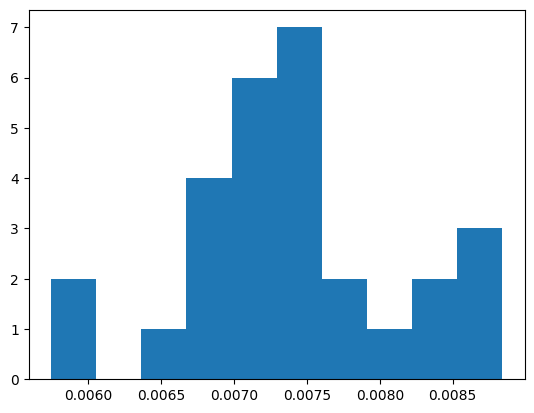

In [4]:
plt.hist(features[1])

In [9]:
labels=features['Label']
features=features.drop(columns=['Label'])
features=features.apply(pd.to_numeric, errors='coerce')

features.fillna(0,inplace=True)



# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features.values, labels, test_size=0.2, random_state=42)



KeyError: 'Label'

Classification Report: XGBoost 0.75
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



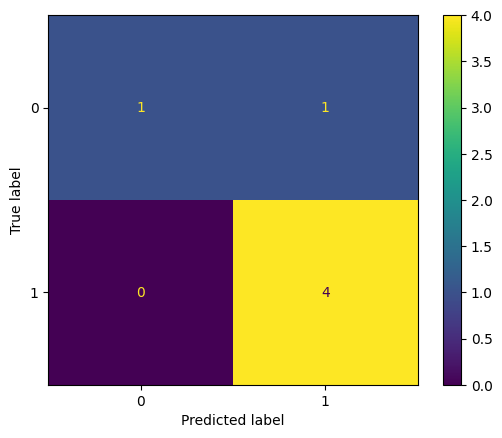

In [10]:
model=XGBoost(X_train,y_train,X_test,y_test,True)